In [ ]:
# Data Details - (5 Marks)

In [29]:
# Q. Import the useful Libraries from description (1 mark)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy import stats
import seaborn as sns

In [30]:
# Q. Load the wine quality dataset and print the head. (1 mark)
wine=pd.read_csv("winequality.csv")
wine.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
# Q. Count the value of Quality and perform pairplot. (1 mark)
wine['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

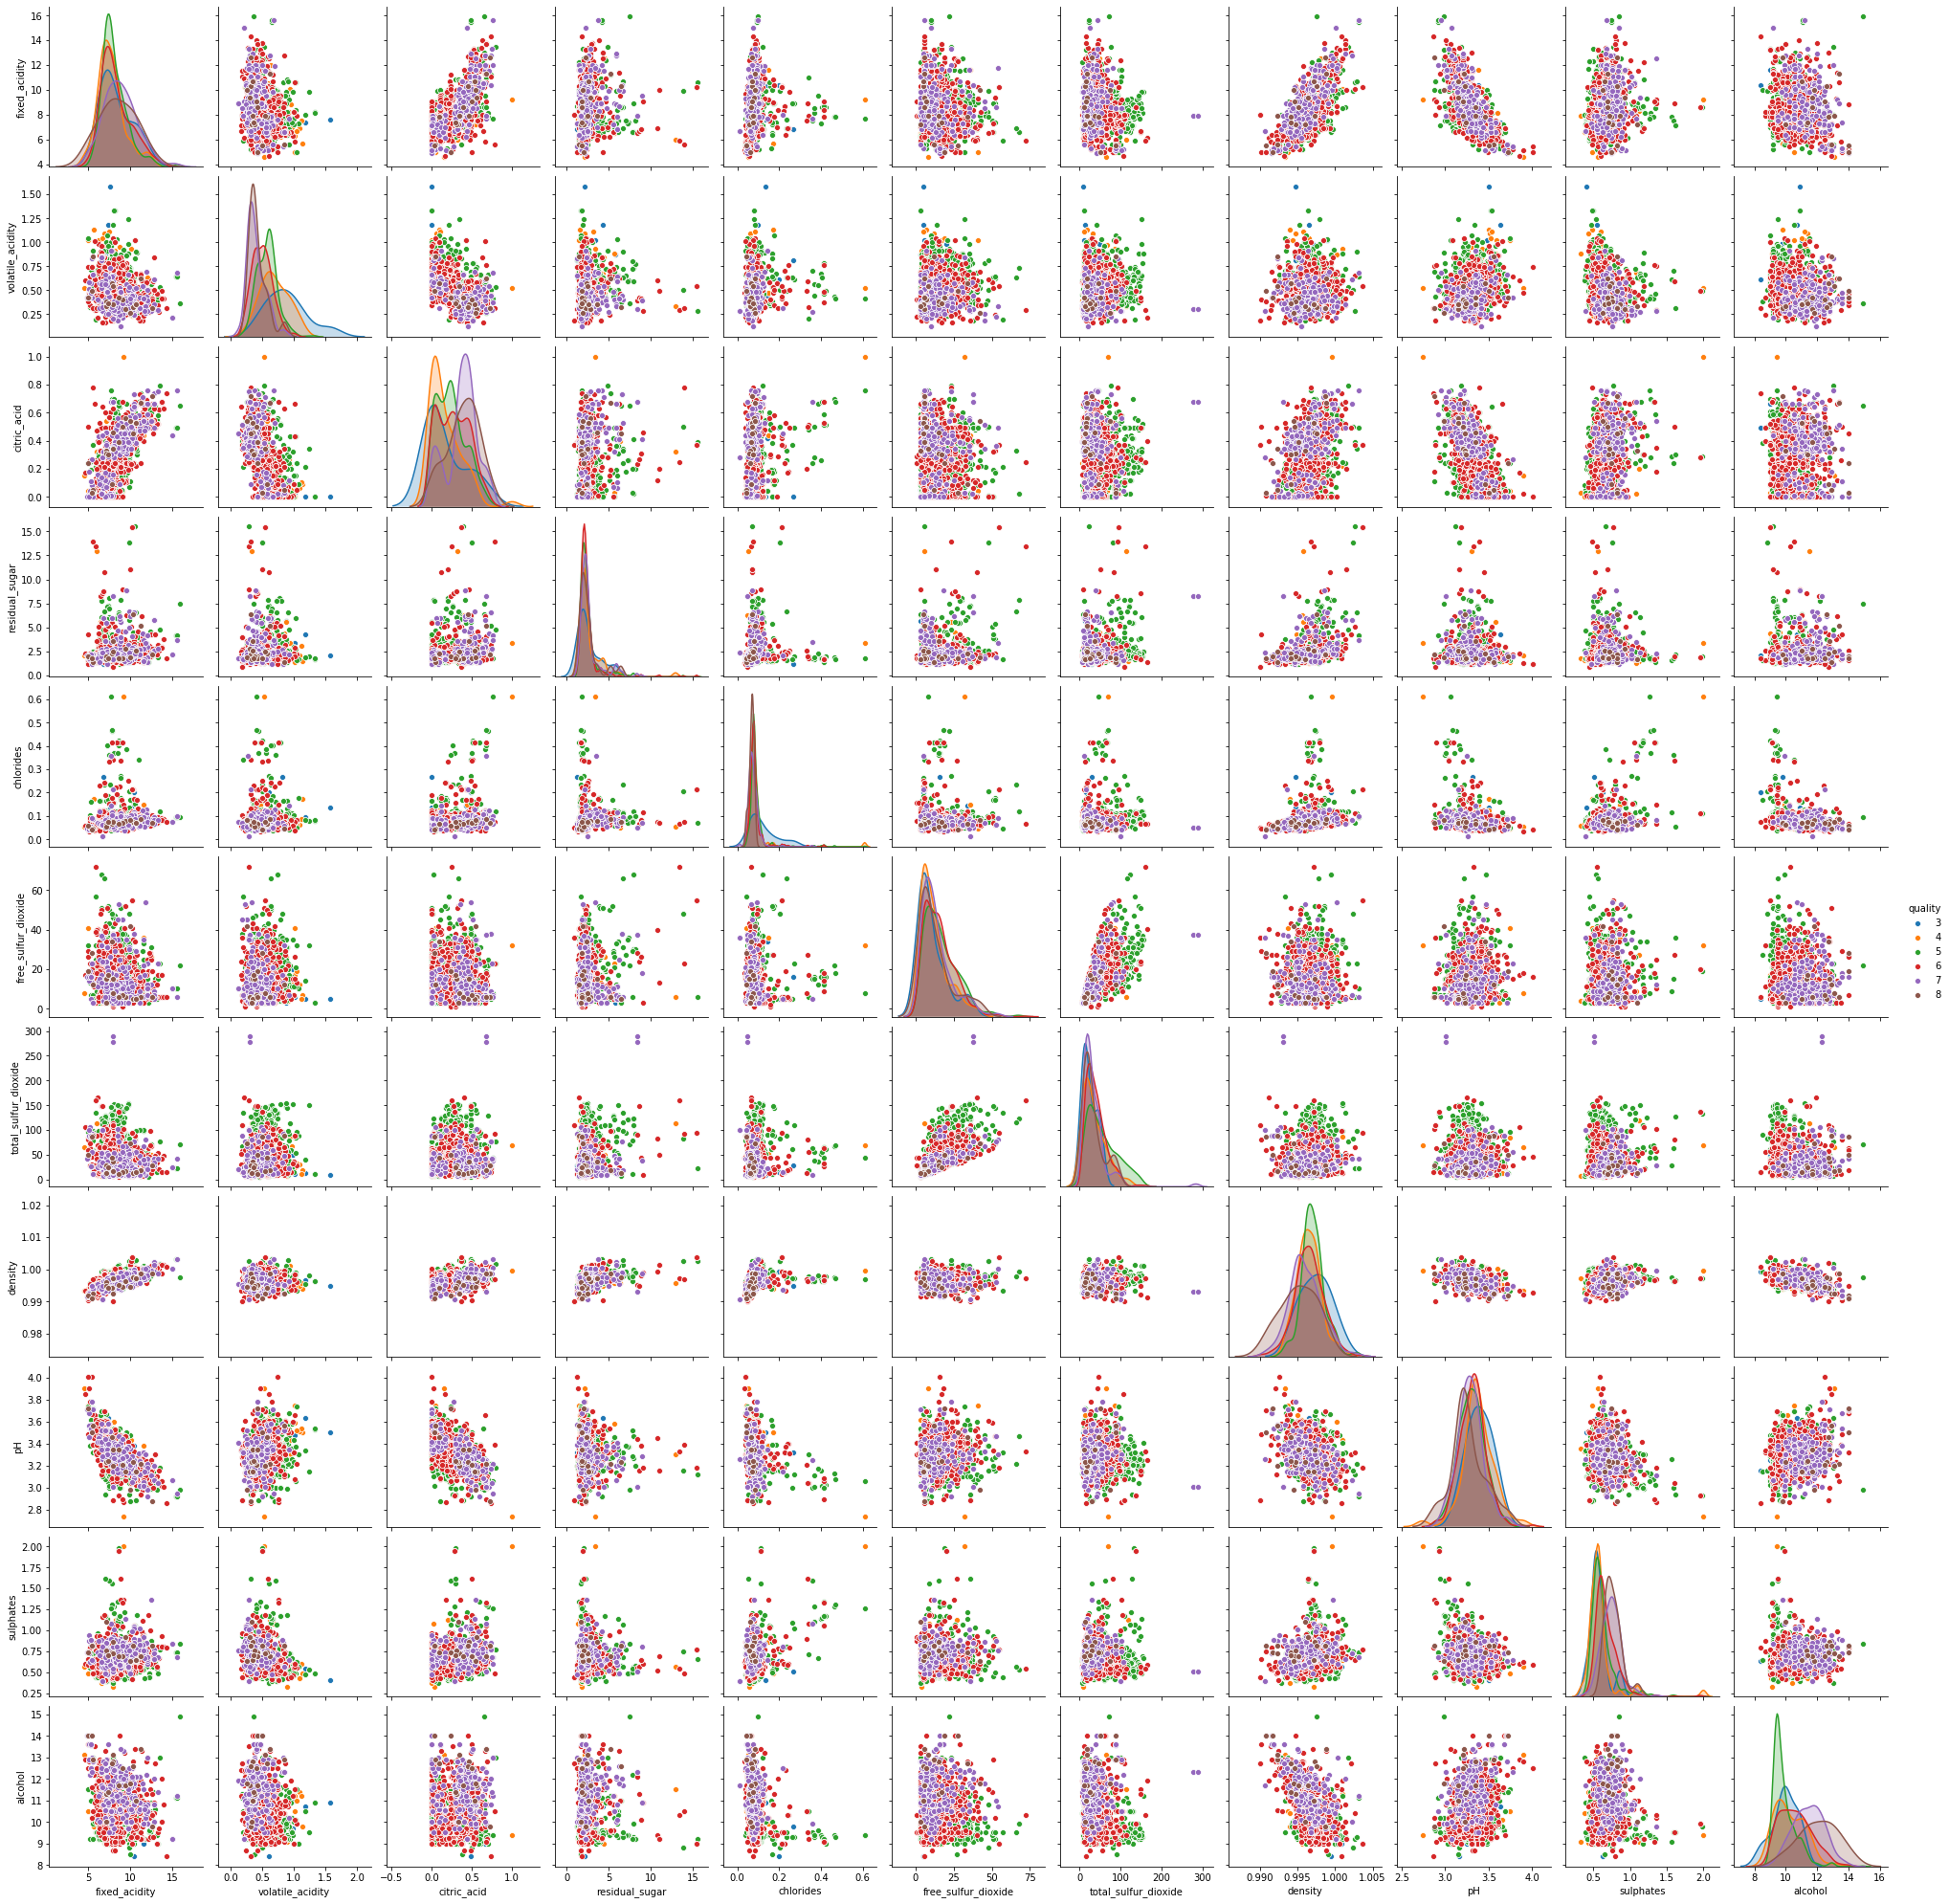

In [32]:
sns.pairplot(wine,hue="quality")

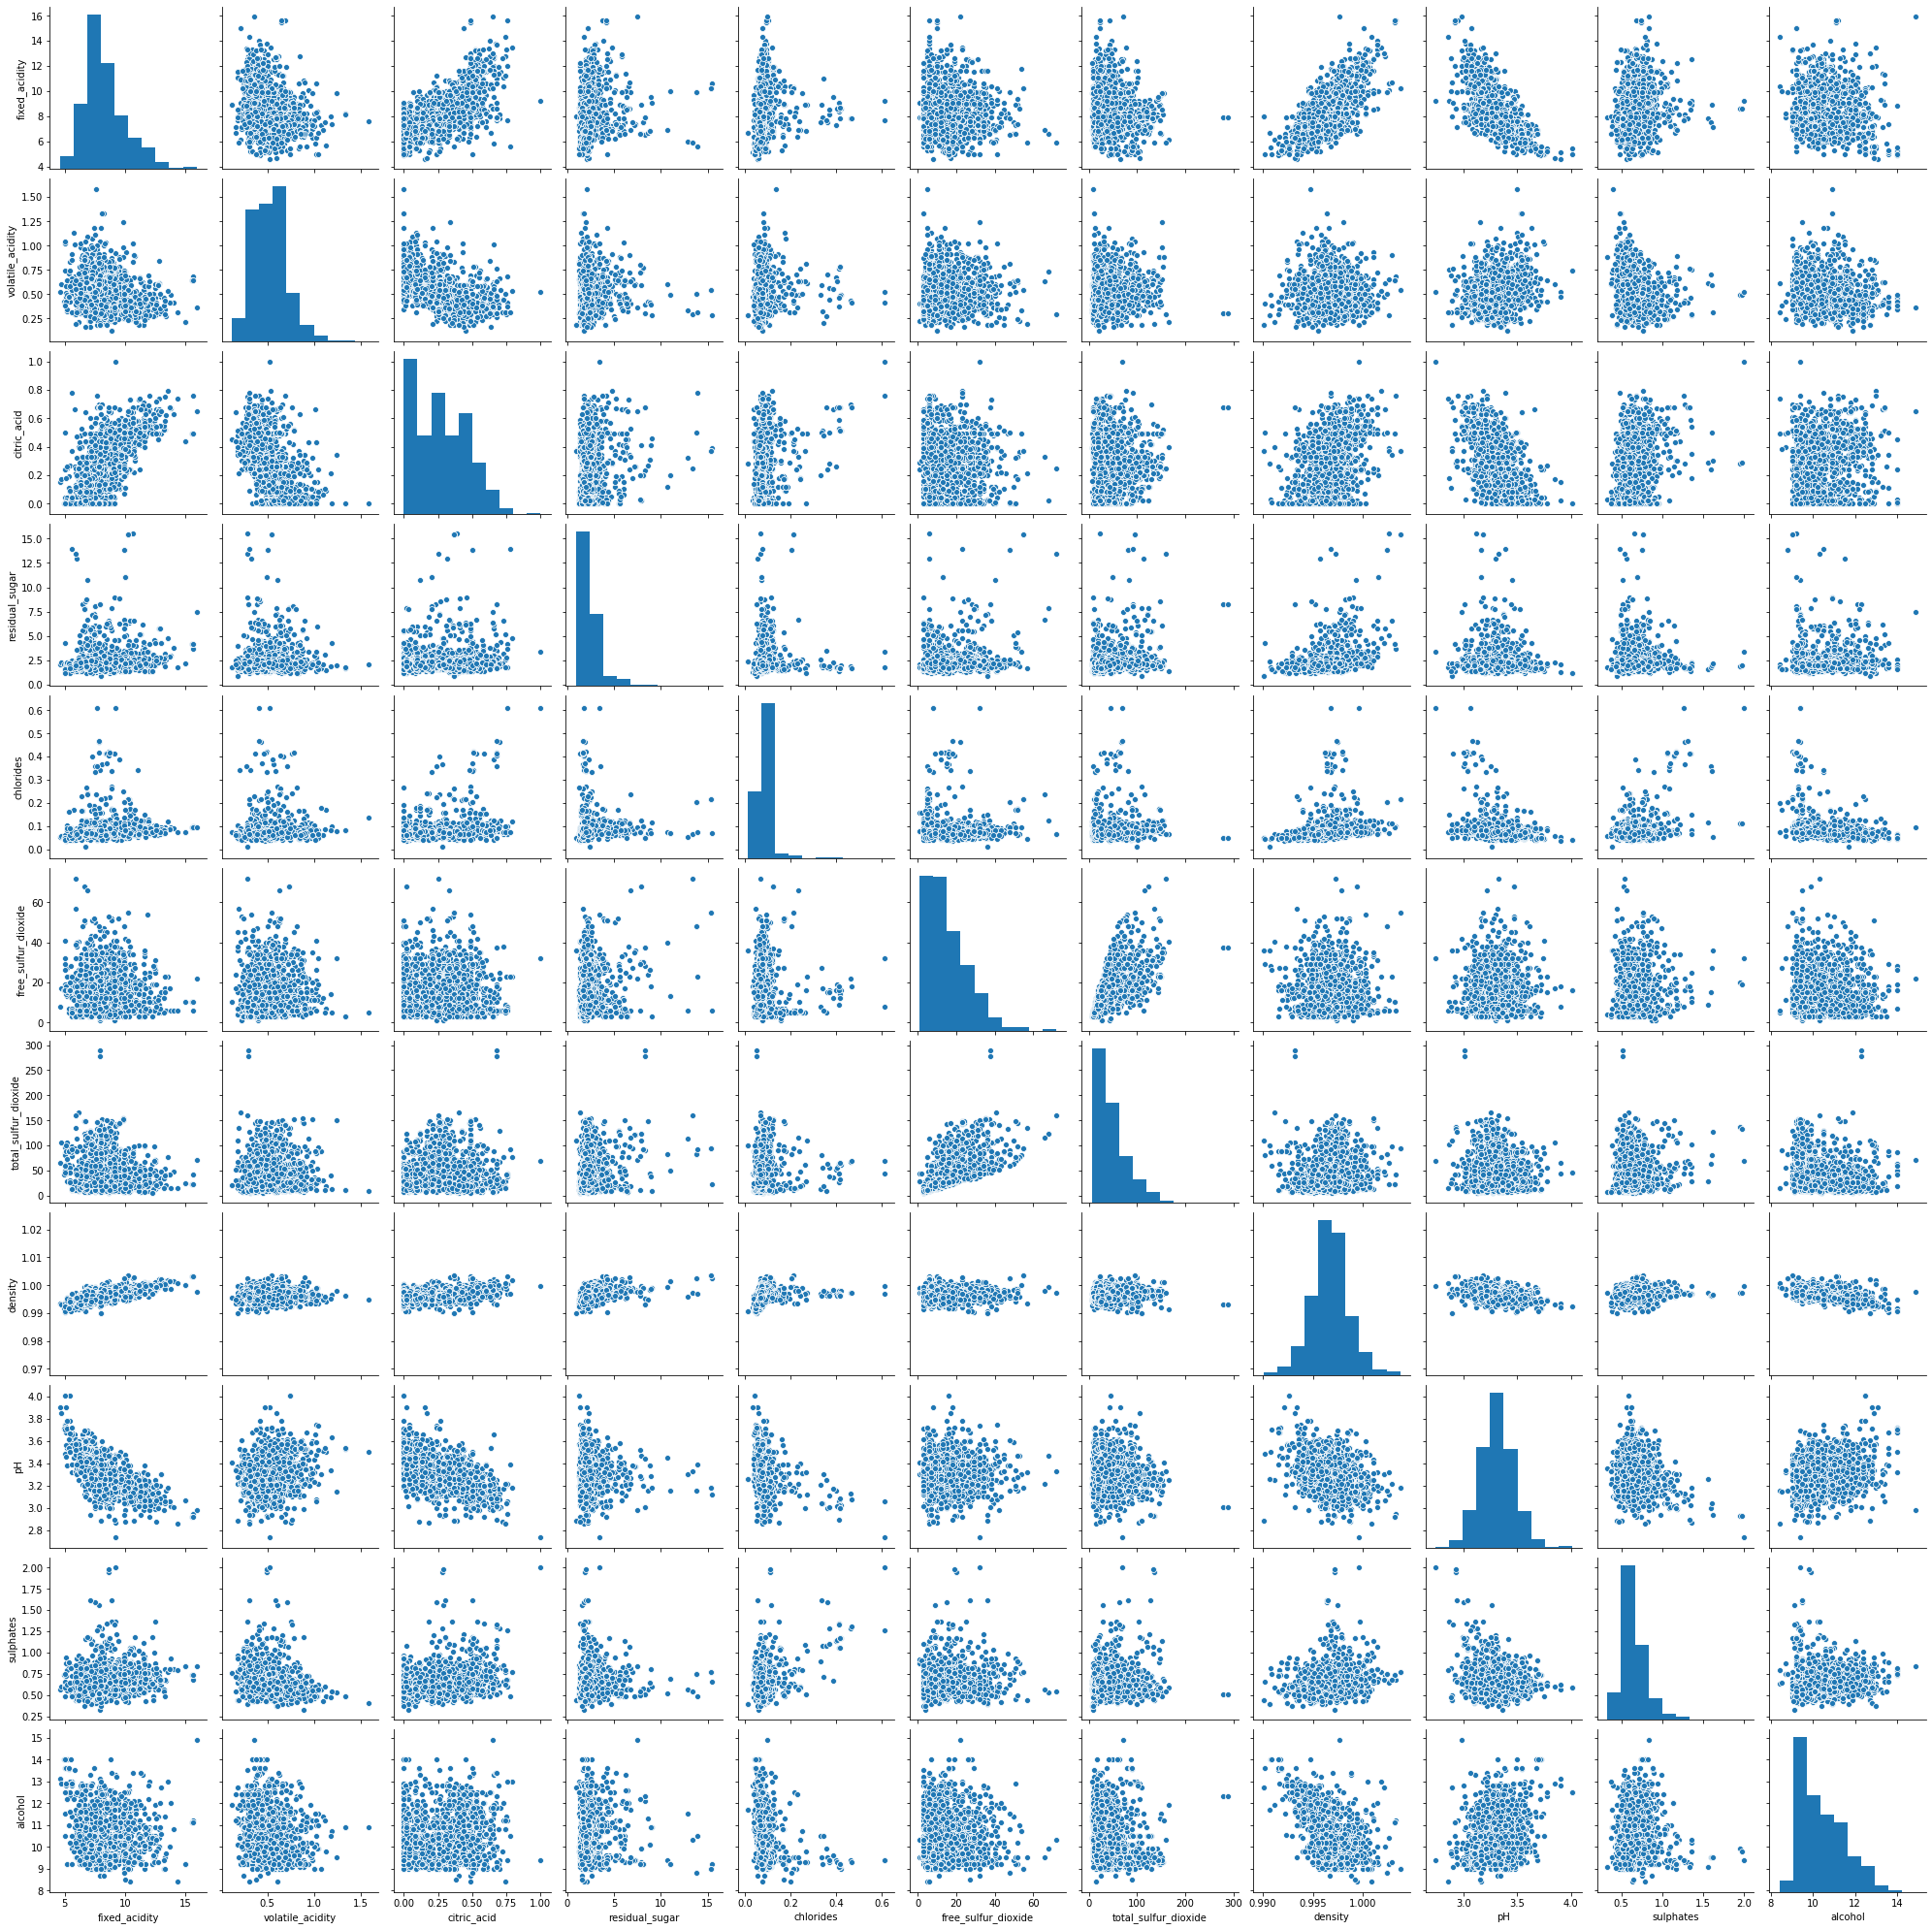

In [33]:
# Q. Drop Quality Feature From Dataset and perform pairplot. (1 mark)
wine1=wine.drop(["quality"],axis=1)
wine1.head()
sns.pairplot(wine1)

In [34]:
# Q. Scale the Dataset (apply z-score) (1 mark)
stats.zscore(wine)

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

# Perform Kmean  Clustering - (13 marks)

In [42]:
# Let us check optimal number of clusters-

# Q. Find suitable no of clusters for K means. (1 mark)
ks=[1,2,3,4,5,6,7]
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(wine1)
    inertia.append(model.inertia_)
kmean=KMeans(n_clusters=2)
kmean.fit(wine1)
# Q. Capture the cluster lables. (1 mark)
print('label:',kmean.labels_)

# Q. Capture the centroids. (1 mark)
print('centroid:',kmean.cluster_centers_)
# Q. Capture the intertia. (1 mark)
print('inertia:',kmean.inertia_)


label: [1 0 1 ... 1 1 1]
centroid: [[8.02595238e+00 5.51642857e-01 2.83428571e-01 2.94452381e+00
  9.31380952e-02 2.57083333e+01 9.17285714e+01 9.96942738e-01
  3.29873810e+00 6.62690476e-01 1.00938889e+01]
 [8.42425785e+00 5.19334182e-01 2.66539440e-01 2.39427481e+00
  8.54461408e-02 1.23719254e+01 3.03443596e+01 9.96676836e-01
  3.31552163e+00 6.56530958e-01 1.05402177e+01]]
inertia: 691909.8671253552


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

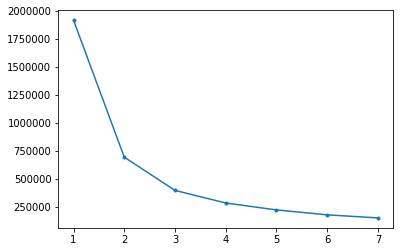

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
# Q. Perform the Elbow plot. (2 mark)
plt.plot(ks,inertia,marker=".")
plt.show()
kmean=KMeans(n_clusters=2)
kmean.fit(wine)

# Take Appropriate Cluster and Build a Kmean Cluster

In [38]:
# Q. Set number of clusters. (1 mark)
kmeans=KMeans(n_clusters=3)

In [39]:
# Q. Fit the input data. (1 mark)
kmeans.fit(wine)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
# Q. Perfrom the Centroids and print it. (1 mark)
print(kmeans.cluster_centers_)

[[8.28699634e+00 5.20503663e-01 2.72435897e-01 2.49706960e+00
  9.13095238e-02 2.15705128e+01 5.48882784e+01 9.96855769e-01
  3.32020147e+00 6.77106227e-01 1.03768010e+01 5.62820513e+00]
 [7.88755187e+00 5.72365145e-01 2.75643154e-01 3.23236515e+00
  8.83983402e-02 2.61514523e+01 1.08506224e+02 9.96934730e-01
  3.28962656e+00 6.52033195e-01 1.00089212e+01 5.30705394e+00]
 [8.46982759e+00 5.19519704e-01 2.68608374e-01 2.36102217e+00
  8.46059113e-02 8.99507389e+00 2.23928571e+01 9.96617512e-01
  3.31137931e+00 6.47216749e-01 1.05769294e+01 5.73891626e+00]]


# hint
kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [49]:
# Q. Create a new dataframe only for labels and convert it into categorical variable. (1 mark)

labels_df=pd.DataFrame(kmean.labels_)
labels_df.columns=['label']
print(labels_df)
labels_df=labels_df.replace([1,0],['red','white'])
print(labels_df)

      label
0         1
1         0
2         1
3         1
4         1
...     ...
1594      1
1595      1
1596      1
1597      1
1598      1

[1599 rows x 1 columns]
      label
0       red
1     white
2       red
3       red
4       red
...     ...
1594    red
1595    red
1596    red
1597    red
1598    red

[1599 rows x 1 columns]


In [55]:
# Q. Join the label dataframe with the Wine data frame to create s_df_labeled. Note: it could be appended to original dataframe. (1 mark)
s_df_labeled=pd.concat([wine1,labels_df],axis=1)
s_df_labeled


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,white
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,red


In [73]:
# Q. Groupby s_df_labeled and label data using Groupby function. (1 mark)

wine_clusters = wine1.groupby(['s_df_labeled','labels_df']).mean()


KeyError: 's_df_labeled'

# Use silhouette_Coefficient to Find best No of Cluster -(5 Marks)

In [96]:
## 
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(wine)
    preds = km.predict(wine)
    silhouette = silhouette_score(wine,preds)
    silhouette_coefficients.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.602787046957436
Silhouette score for number of cluster(s) 3: 0.5184003155871253
Silhouette score for number of cluster(s) 4: 0.48448390096383803
Silhouette score for number of cluster(s) 5: 0.4451649073633106
Silhouette score for number of cluster(s) 6: 0.44626305386540344
Silhouette score for number of cluster(s) 7: 0.3920564307435537
Silhouette score for number of cluster(s) 8: 0.38541134952156036
Silhouette score for number of cluster(s) 9: 0.3823228452563326
Silhouette score for number of cluster(s) 10: 0.3801474576185119
Silhouette score for number of cluster(s) 11: 0.37961842041198135


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

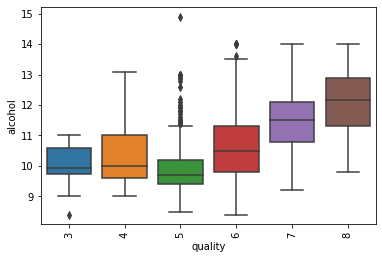

In [60]:
# Q. Show the final Boxplot (2 mark)

sns.boxplot(x="quality",y="alcohol",data=wine)
plt.xticks(rotation=90)


# Build a Dendogram -(5 marks)

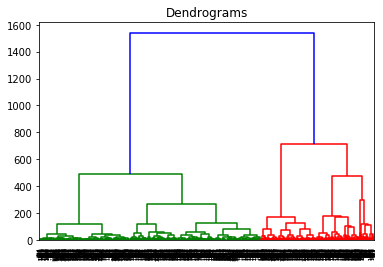

In [61]:
#from scipy.cluster import hierarchy
#den= hierarchy.linkage(wine, 'ward')
#plt.figure()
#dn = hierarchy.dendrogram(den)
import scipy.cluster.hierarchy as sch
plt.figure()  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(wine, method='ward'))


# END